In [1]:
%run '/home/gvolta/XENON1T/Function/Useful/Def.ipynb'
%run '/home/gvolta/XENON1T/Function/Useful/S1PL_Def.ipynb'

Initialization done, Notebook was last run on: 27/11/2019
Initialization for S1PL, Notebook was last run on: 27/11/2019


In [2]:
import hax
hax.init(experiment='XENON1T',
         pax_version_policy = 'v6.10.1',
         )

In [3]:
from statsmodels.stats.proportion import proportion_confint
binomial_error_method = 'wilson'
binomial_alpha = 0.68


def acceptance(data_before, data_after, label= '', color='navy', markersize=10):
    after, bins=np.histogram(data_after ,bins=Bins, range=hist_range)
    before, bins=np.histogram(data_before ,bins=Bins, range=hist_range)

    acceptance = after/before
    error = proportion_confint(after, before, method=binomial_error_method, alpha=binomial_alpha)
    err_low = error[0]
    err_high = error[1]
    yerr_low, yerr_high = (acceptance - err_low, err_high - acceptance)
    err = (yerr_low, yerr_high)
    
    plt.errorbar(binn, acceptance, err,0, marker='.', markersize=markersize, linestyle="", linewidth=0.5, color=color, label=label)
    plt.axhline(y=1, color='k',linestyle='--')
    plt.ylabel('acceptance', fontsize=26)
    plt.tick_params(labelsize=20)
    plt.ylim(0,1.05)

In [4]:
file_path = '/dali/lgrandi/giovo/pickle_haxcache/pax_v6.10.1/S1PL_data/selected/'
data = pd.read_pickle(file_path + 'bkg_cutted_SR1_S1PL.pkl')
data['CES'] = CES(data, 'cs2_bottom_nn_tf')
data_1 = data[data['s1']<3e4]

# Input per S1PL cut

In [5]:
popt_z_high = [2.38811218e+02, 2.55991432e-05, 1.89468970e-01] #exp
popt_z_low = [1.05256551e+02, 7.72450878e-02] #poly1

popt_1 = [1.49406369e+01,  2.62994597e+01, -1.01825116e+00,  1.27941177e-02] #S1PatternLikelihoodProfile_1
popt_2 = [2.18914476e+02, 1.19392164e+02, 5.32460349e-05] #S1arctan

In [6]:
energy_peak = np.array([42, 164, 236, 609, 1120, 1173, 1332, 1461, 1764, 2204, 2614]) #keV
resolution = np.array([0.0516, 0.0260, 0.0223, 0.0137, 0.0117, 0.0109, 0.0103, 0.0091, 0.0092, 0.0081, 0.0081])
sigma_peak = energy_peak*resolution
energy_peak_lower = energy_peak-2*sigma_peak
energy_peak_higher = energy_peak+2*sigma_peak

In [7]:
#83 Kr
gamma42 = data_1[(data_1['CES']/10**3<=energy_peak_higher[0])&(data_1['CES']/10**3>=energy_peak_lower[0])]
cut_gamma42 = (data_1['CES']/10**3<=energy_peak_higher[0])&(data_1['CES']/10**3>=energy_peak_lower[0])
#131m Xe 
gamma164 = data_1[(data_1['CES']/10**3<=energy_peak_higher[1])&(data_1['CES']/10**3>=energy_peak_lower[1])]
cut_gamma164 = (data_1['CES']/10**3<=energy_peak_higher[1])&(data_1['CES']/10**3>=energy_peak_lower[1])
#129m Xe
gamma236 = data_1[(data_1['CES']/10**3<=energy_peak_higher[2])&(data_1['CES']/10**3>=energy_peak_lower[2])]
cut_gamma236 = (data_1['CES']/10**3<=energy_peak_higher[2])&(data_1['CES']/10**3>=energy_peak_lower[2])
#214 Bi
gamma609 = data_1[(data_1['CES']/10**3<=energy_peak_higher[3])&(data_1['CES']/10**3>=energy_peak_lower[3])]
cut_gamma609 = (data_1['CES']/10**3<=energy_peak_higher[3])&(data_1['CES']/10**3>=energy_peak_lower[3])
#214 Bi
gamma1120 = data_1[(data_1['CES']/10**3<=energy_peak_higher[4])&(data_1['CES']/10**3>=energy_peak_lower[4])]
cut_gamma1120 = (data_1['CES']/10**3<=energy_peak_higher[4])&(data_1['CES']/10**3>=energy_peak_lower[4])
#60 Co
gamma1173 = data_1[(data_1['CES']/10**3<=energy_peak_higher[5])&(data_1['CES']/10**3>=energy_peak_lower[5])]
cut_gamma1173 = (data_1['CES']/10**3<=energy_peak_higher[5])&(data_1['CES']/10**3>=energy_peak_lower[5])
#60 Co
gamma1332 = data_1[(data_1['CES']/10**3<=energy_peak_higher[6])&(data_1['CES']/10**3>=energy_peak_lower[6])]
cut_gamma1332 = (data_1['CES']/10**3<=energy_peak_higher[6])&(data_1['CES']/10**3>=energy_peak_lower[6])
#40 K
gamma1461 = data_1[(data_1['CES']/10**3<=energy_peak_higher[7])&(data_1['CES']/10**3>=energy_peak_lower[7])]
cut_gamma1461 = (data_1['CES']/10**3<=energy_peak_higher[7])&(data_1['CES']/10**3>=energy_peak_lower[7])
#214 Bi
gamma1764 = data_1[(data_1['CES']/10**3<=energy_peak_higher[8])&(data_1['CES']/10**3>=energy_peak_lower[8])]
cut_gamma1764 = (data_1['CES']/10**3<=energy_peak_higher[8])&(data_1['CES']/10**3>=energy_peak_lower[8])
#214 Bi 
gamma2204 = data_1[(data_1['CES']/10**3<=energy_peak_higher[9])&(data_1['CES']/10**3>=energy_peak_lower[9])]
cut_gamma2204 = (data_1['CES']/10**3<=energy_peak_higher[9])&(data_1['CES']/10**3>=energy_peak_lower[9])
#208 Tl 
gamma2614 = data_1[(data_1['CES']/10**3<=energy_peak_higher[10])&(data_1['CES']/10**3>=energy_peak_lower[10])]
cut_gamma2614 = (data_1['CES']/10**3<=energy_peak_higher[10])&(data_1['CES']/10**3>=energy_peak_lower[10])

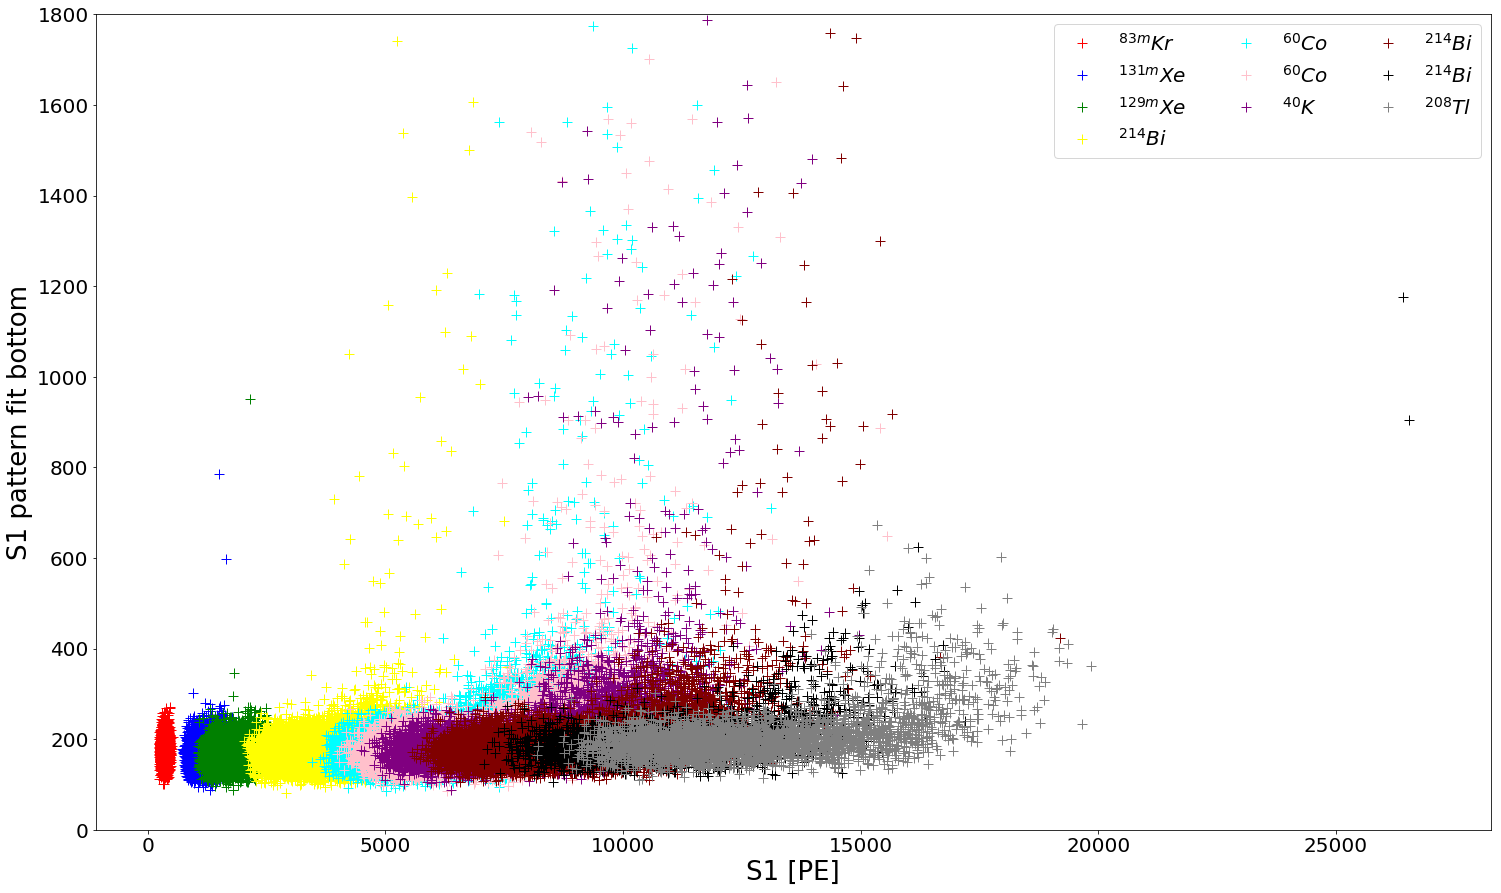

In [8]:
plt.figure(figsize=(25,15))

plt.plot(gamma42['s1'], gamma42['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='red', label='$^{83m}Kr$')
plt.plot(gamma164['s1'], gamma164['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='blue', label='$^{131m}Xe$')
plt.plot(gamma236['s1'], gamma236['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='green', label='$^{129m}Xe$')
plt.plot(gamma609['s1'], gamma609['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='yellow', label='$^{214}Bi$')
#plt.plot(gamma1120['s1'], gamma1120['s1_pattern_fit_bottom_hax'],
#        marker='+', markersize=10, linestyle=' ', color='orange', label='$^{214}Bi$')
plt.plot(gamma1173['s1'], gamma1173['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='cyan', label='$^{60}Co$')
plt.plot(gamma1332['s1'], gamma1332['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='pink', label='$^{60}Co$')
plt.plot(gamma1461['s1'], gamma1461['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='purple', label='$^{40}K$')
plt.plot(gamma1764['s1'], gamma1764['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='maroon', label='$^{214}Bi$')
plt.plot(gamma2204['s1'], gamma2204['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='black', label='$^{214}Bi$')
plt.plot(gamma2614['s1'], gamma2614['s1_pattern_fit_bottom_hax'],
        marker='+', markersize=10, linestyle=' ', color='grey', label='$^{208}Tl$')

plt.legend(loc=0, ncol=3, fontsize = 20)
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
plt.ylim(bottom= 0, top=1800)

# gamma42, gamma164, gamma236, gamma609, gamma1120, gamma1173, gamma1332, gamma1461, gamma1764, gamma2204, gamma2614
data_gamma = pd.concat([gamma42, gamma164, gamma236, gamma609, gamma1173, gamma1332, gamma1461, gamma1764, gamma2204, gamma2614])

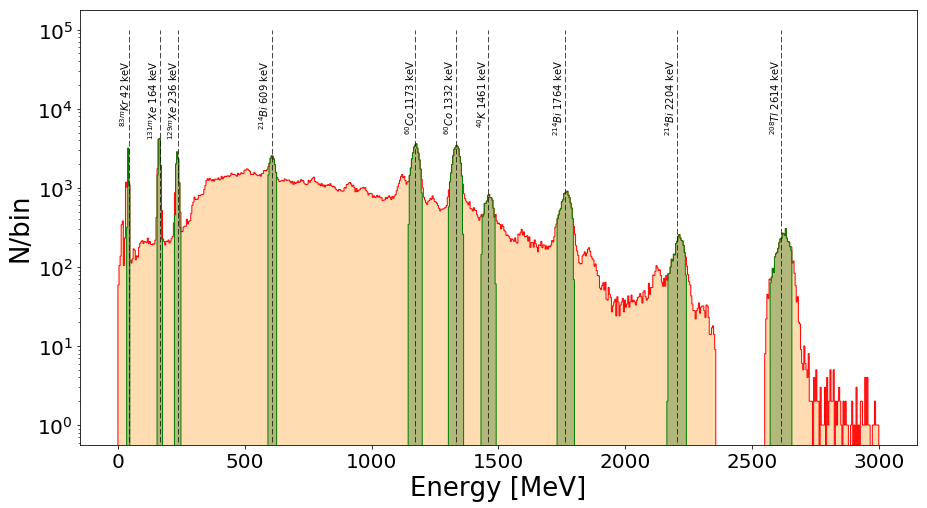

In [9]:
plt.figure(figsize=(15,8))
plt.hist(data_1['CES']/10**3, bins = (700), 
         range=(0,3000), 
         histtype='bar', color='darkorange',
         alpha = 0.3)
plt.hist(data_1['CES']/10**3, bins = (700), 
         range=(0,3000), 
         histtype='step', color='red',
         alpha = 1)
plt.xlabel('Energy [MeV]', fontsize=26)
plt.ylabel('N/bin', fontsize=26)
plt.yscale('log')

plt.hist(data_gamma['CES']/10**3, bins = (700), 
         range=(0,3000), 
         histtype='bar', color='darkgreen',
         alpha = 0.3)
plt.hist(data_gamma['CES']/10**3, bins = (700), 
         range=(0,3000), 
         histtype='step', color='green',
         alpha = 1)
plt.xlabel('Energy [MeV]', fontsize=26)
plt.ylabel('N/bin', fontsize=26)
plt.yscale('log')

plt.vlines(x=42, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(0, 3e4, '$^{83m}Kr$ 42 keV', rotation=90, size=10)

plt.vlines(x=164, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(110, 3e4, '$^{131m}Xe$ 164 keV', rotation=90, size=10)

plt.vlines(x=236, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(190, 3e4, '$^{129m}Xe$ 236 keV', rotation=90, size=10)

plt.vlines(x=609, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(550, 3e4, '$^{214}Bi$ 609 keV', rotation=90, size=10)

#plt.vlines(x=1120, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
#plt.text(1070, 3e4, '$^{214}Bi$ 1120 keV', rotation=90, size=10)

plt.vlines(x=1173, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(1125, 3e4, '$^{60}Co$ 1173 keV', rotation=90, size=10)

plt.vlines(x=1332, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(1280, 3e4, '$^{60}Co$ 1332 keV', rotation=90, size=10)

plt.vlines(x=1461, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(1410, 3e4, '$^{40}K$ 1461 keV', rotation=90, size=10)

plt.vlines(x=1764, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(1710, 3e4, '$^{214}Bi$ 1764 keV', rotation=90, size=10)

plt.vlines(x=2204, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(2150, 3e4, '$^{214}Bi$ 2204 keV', rotation=90, size=10)

#plt.vlines(x=2448, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
#plt.text(2456, 3e4, '$^{214}Bi$ 2448 keV', rotation=90, size=10)

plt.vlines(x=2614, ymin=0, ymax=1e5, colors='k', linestyles='dashed', linewidth=0.7)
plt.text(2565, 3e4, '$^{208}Tl$ 2614 keV', rotation=90, size=10)

plt.tick_params(labelsize=20)

#### Applichiamo il taglio ad ogni photo-peak e vediamo come sono distribuiti

In [10]:
import lax
from lax.lichens import postsr1
CutS1PL_HE = postsr1.S1PatternLikelihood_HE()

In [11]:
###########################################################
## gamma42, gamma164, gamma236, gamma609, gamma1173, 
## gamma1332, gamma1461, gamma1764, gamma2204, gamma2614
###########################################################

gamma42 = CutS1PL_HE.process(gamma42)
gamma164 = CutS1PL_HE.process(gamma164)
gamma236 = CutS1PL_HE.process(gamma236)
gamma609 = CutS1PL_HE.process(gamma609)
gamma1173 = CutS1PL_HE.process(gamma1173)
gamma1332 = CutS1PL_HE.process(gamma1332)
gamma1461 = CutS1PL_HE.process(gamma1461)
gamma1764 = CutS1PL_HE.process(gamma1764)
gamma2204 = CutS1PL_HE.process(gamma2204)
gamma2614 = CutS1PL_HE.process(gamma2614)

print('\nGamma42: ')
gamma42_GOOD = hax.cuts.selection(gamma42, gamma42['CutS1PatternLikelihood_HE'] == True)
gamma42_BAD = hax.cuts.selection(gamma42, gamma42['CutS1PatternLikelihood_HE'] == False)
print('\nGamma164: ')
gamma164_GOOD = hax.cuts.selection(gamma164, gamma164['CutS1PatternLikelihood_HE'] == True)
gamma164_BAD = hax.cuts.selection(gamma164, gamma164['CutS1PatternLikelihood_HE'] == False)
print('\nGamma236: ')
gamma236_GOOD = hax.cuts.selection(gamma236, gamma236['CutS1PatternLikelihood_HE'] == True)
gamma236_BAD = hax.cuts.selection(gamma236, gamma236['CutS1PatternLikelihood_HE'] == False)
print('\nGamma609: ')
gamma609_GOOD = hax.cuts.selection(gamma609, gamma609['CutS1PatternLikelihood_HE'] == True)
gamma609_BAD = hax.cuts.selection(gamma609, gamma609['CutS1PatternLikelihood_HE'] == False)
print('\nGamma1173: ')
gamma1173_GOOD = hax.cuts.selection(gamma1173, gamma1173['CutS1PatternLikelihood_HE'] == True)
gamma1173_BAD = hax.cuts.selection(gamma1173, gamma1173['CutS1PatternLikelihood_HE'] == False)
print('\nGamma1332: ')
gamma1332_GOOD = hax.cuts.selection(gamma1332, gamma1332['CutS1PatternLikelihood_HE'] == True)
gamma1332_BAD = hax.cuts.selection(gamma1332, gamma1332['CutS1PatternLikelihood_HE'] == False)
print('\nGamma1461: ')
gamma1461_GOOD = hax.cuts.selection(gamma1461, gamma1461['CutS1PatternLikelihood_HE'] == True)
gamma1461_BAD = hax.cuts.selection(gamma1461, gamma1461['CutS1PatternLikelihood_HE'] == False)
print('\nGamma1764: ')
gamma1764_GOOD = hax.cuts.selection(gamma1764, gamma1764['CutS1PatternLikelihood_HE'] == True)
gamma1764_BAD = hax.cuts.selection(gamma1764, gamma1764['CutS1PatternLikelihood_HE'] == False)
print('\nGamma2204: ')
gamma2204_GOOD = hax.cuts.selection(gamma2204, gamma2204['CutS1PatternLikelihood_HE'] == True)
gamma2204_BAD = hax.cuts.selection(gamma2204, gamma2204['CutS1PatternLikelihood_HE'] == False)
print('\nGamma2614: ')
gamma2614_GOOD = hax.cuts.selection(gamma2614, gamma2614['CutS1PatternLikelihood_HE'] == True)
gamma2614_BAD = hax.cuts.selection(gamma2614, gamma2614['CutS1PatternLikelihood_HE'] == False)

/home/gvolta/.local/lib/python3.4/site-packages/lax-1.7.2-py3.4.egg/lax/lichens/postsr1.py:298: RuntimeWarning: overflow encountered in exp
  return self.popt_z_1[0] + self.popt_z_1[0] *np.exp(-self.popt_z_1[0]*x)
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/cvmfs/xenon.opensciencegr


Gamma42: 
Unnamed selection: 44 rows removed (99.03% passed)
Unnamed selection: 4501 rows removed (0.97% passed)

Gamma164: 
Unnamed selection: 165 rows removed (98.62% passed)
Unnamed selection: 11764 rows removed (1.38% passed)

Gamma236: 
Unnamed selection: 106 rows removed (98.84% passed)
Unnamed selection: 9003 rows removed (1.16% passed)

Gamma609: 
Unnamed selection: 362 rows removed (97.84% passed)
Unnamed selection: 16385 rows removed (2.16% passed)

Gamma1173: 
Unnamed selection: 1137 rows removed (96.19% passed)
Unnamed selection: 28674 rows removed (3.81% passed)

Gamma1332: 
Unnamed selection: 1171 rows removed (96.13% passed)
Unnamed selection: 29072 rows removed (3.87% passed)

Gamma1461: 
Unnamed selection: 765 rows removed (90.28% passed)
Unnamed selection: 7104 rows removed (9.72% passed)

Gamma1764: 
Unnamed selection: 443 rows removed (95.58% passed)
Unnamed selection: 9589 rows removed (4.42% passed)

Gamma2204: 
Unnamed selection: 125 rows removed (95.52% passed)

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


(0, 3)

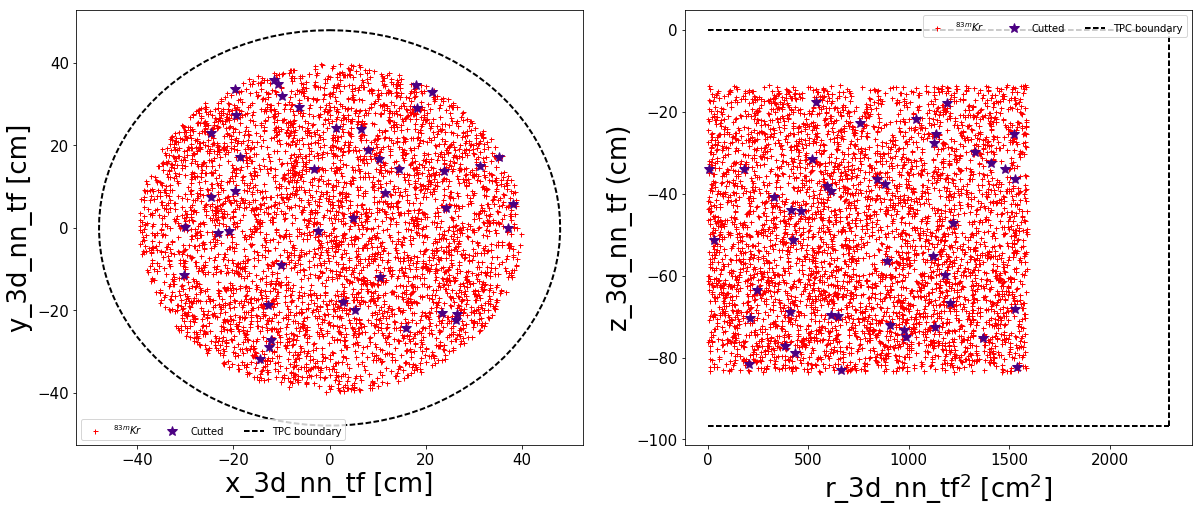

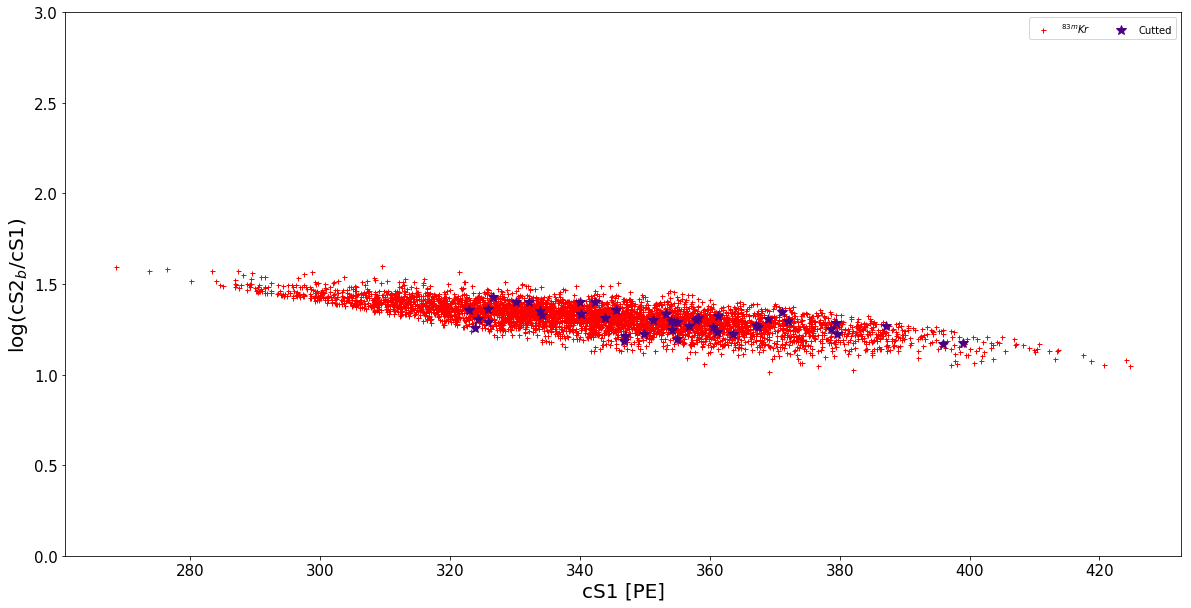

In [27]:
fig = plt.figure(figsize=(20,8))

################################################
plt.subplot(121)
plt.plot(gamma42['x_3d_nn_tf'], gamma42['y_3d_nn_tf'],
        marker='+', markersize=5, linestyle=' ', color='red', label='$^{83m}Kr$')
plt.plot(gamma42_BAD['x_3d_nn_tf'], gamma42_BAD['y_3d_nn_tf'],
        marker='*', markersize=10, linestyle=' ', color='indigo', label='Cutted')
plt_circle(linewidth=2, color='black', linestyle='--')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('x_3d_nn_tf [cm]', fontsize=26)
plt.ylabel('y_3d_nn_tf [cm]', fontsize=26)
plt.tick_params(labelsize=15)

################################################

################################################
plt.subplot(122)
plt.plot(gamma42['r_3d_nn_tf']**2, gamma42['z_3d_nn_tf'],
        marker='+', markersize=5, linestyle=' ', color='red', label='$^{83}Kr$')
plt.plot(gamma42_BAD['r_3d_nn_tf']**2, gamma42_BAD['z_3d_nn_tf'],
        marker='*', markersize=10, linestyle=' ', color='indigo', label='Cutted')
TPC_limit(1, linewidth=2, color='black', linestyle='--')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('r_3d_nn_tf$^2$ [cm$^2$]', fontsize=26)
plt.ylabel('z_3d_nn_tf (cm)', fontsize=26)
plt.tick_params(labelsize=15)
################################################

plt.figure(figsize=(20,10))

################################################
plt.plot(gamma42['cs1_nn_tf'], np.log10(gamma42['cs2_bottom_nn_tf']/gamma42['cs1_nn_tf']),
        marker='+', markersize=5, linestyle=' ', color='red', label='$^{214}Bi$')
plt.plot(gamma42_BAD['cs1_nn_tf'], np.log10(gamma42_BAD['cs2_bottom_nn_tf']/gamma42_BAD['cs1_nn_tf']),
        marker='*', markersize=10, linestyle=' ', color='indigo', label='Cutted')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('cS1 [PE]', fontsize=20)
plt.ylabel('log(cS2$_b$/cS1)', fontsize=20) 
plt.tick_params(labelsize=15)
plt.ylim(bottom=0, top=3)
################################################

#plt.tight_layout()
#plt.show()

(0, 3)

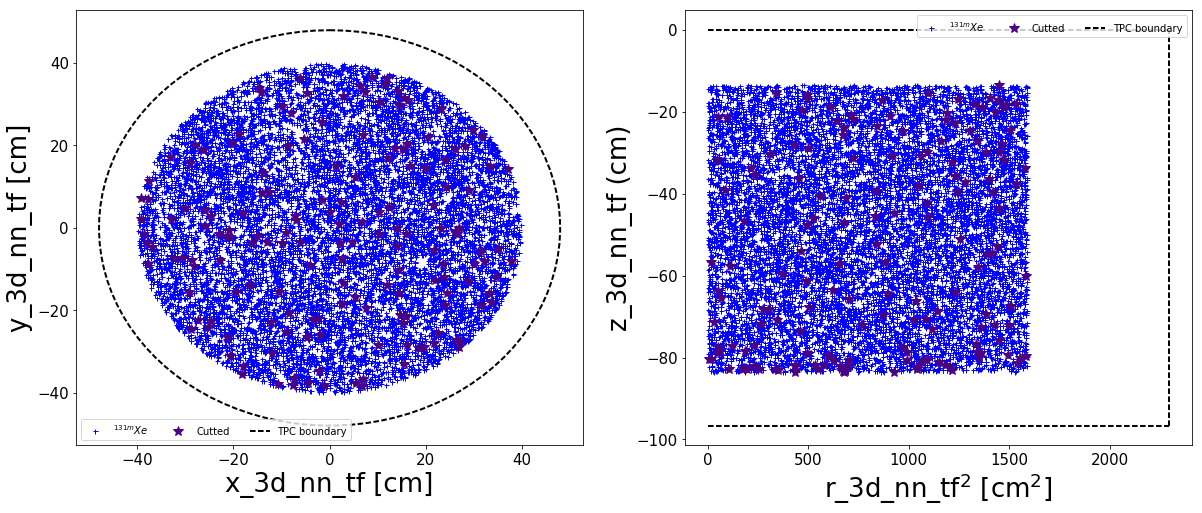

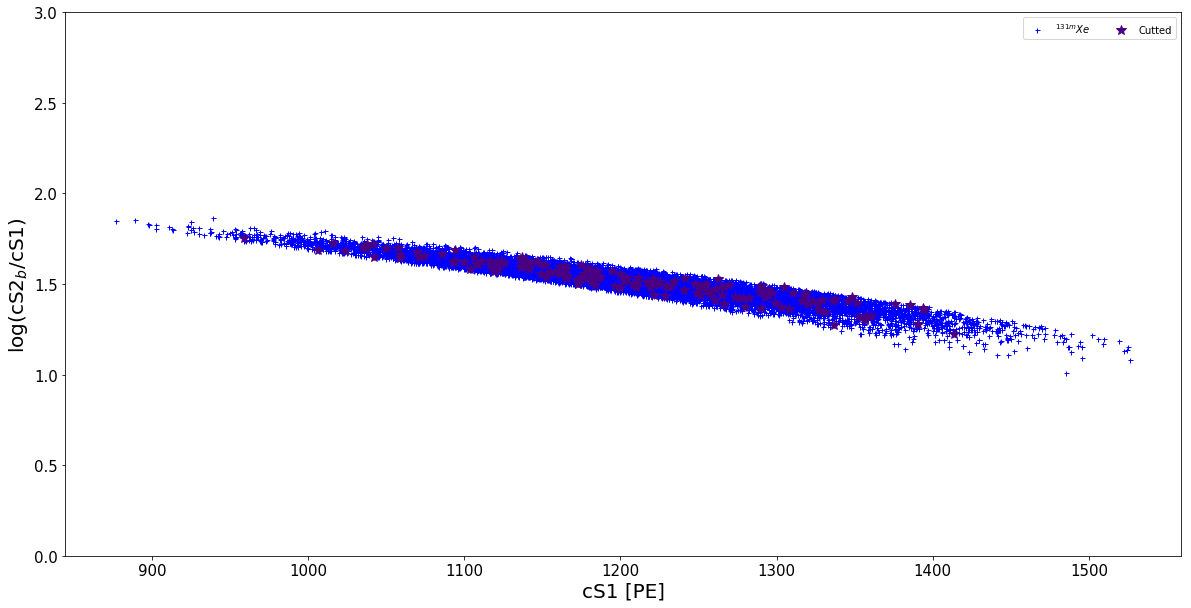

In [28]:
fig = plt.figure(figsize=(20,8))

################################################
plt.subplot(121)
plt.plot(gamma164['x_3d_nn_tf'], gamma164['y_3d_nn_tf'],
        marker='+', markersize=5, linestyle=' ', color='blue', label='$^{131m}Xe$')
plt.plot(gamma164_BAD['x_3d_nn_tf'], gamma164_BAD['y_3d_nn_tf'],
        marker='*', markersize=10, linestyle=' ', color='indigo', label='Cutted')
plt_circle(linewidth=2, color='black', linestyle='--')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('x_3d_nn_tf [cm]', fontsize=26)
plt.ylabel('y_3d_nn_tf [cm]', fontsize=26)
plt.tick_params(labelsize=15)

################################################

################################################
plt.subplot(122)
plt.plot(gamma164['r_3d_nn_tf']**2, gamma164['z_3d_nn_tf'],
        marker='+', markersize=5, linestyle=' ', color='blue', label='$^{131m}Xe$')
plt.plot(gamma164_BAD['r_3d_nn_tf']**2, gamma164_BAD['z_3d_nn_tf'],
        marker='*', markersize=10, linestyle=' ', color='indigo', label='Cutted')
TPC_limit(1, linewidth=2, color='black', linestyle='--')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('r_3d_nn_tf$^2$ [cm$^2$]', fontsize=26)
plt.ylabel('z_3d_nn_tf (cm)', fontsize=26)
plt.tick_params(labelsize=15)
################################################

plt.figure(figsize=(20,10))

################################################
plt.plot(gamma164['cs1_nn_tf'], np.log10(gamma164['cs2_bottom_nn_tf']/gamma164['cs1_nn_tf']),
        marker='+', markersize=5, linestyle=' ', color='blue', label='$^{131m}Xe$')
plt.plot(gamma164_BAD['cs1_nn_tf'], np.log10(gamma164_BAD['cs2_bottom_nn_tf']/gamma164_BAD['cs1_nn_tf']),
        marker='*', markersize=10, linestyle=' ', color='indigo', label='Cutted')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('cS1 [PE]', fontsize=20)
plt.ylabel('log(cS2$_b$/cS1)', fontsize=20) 
plt.tick_params(labelsize=15)
plt.ylim(bottom=0, top=3)
################################################

#plt.tight_layout()
#plt.show()

(0, 3)

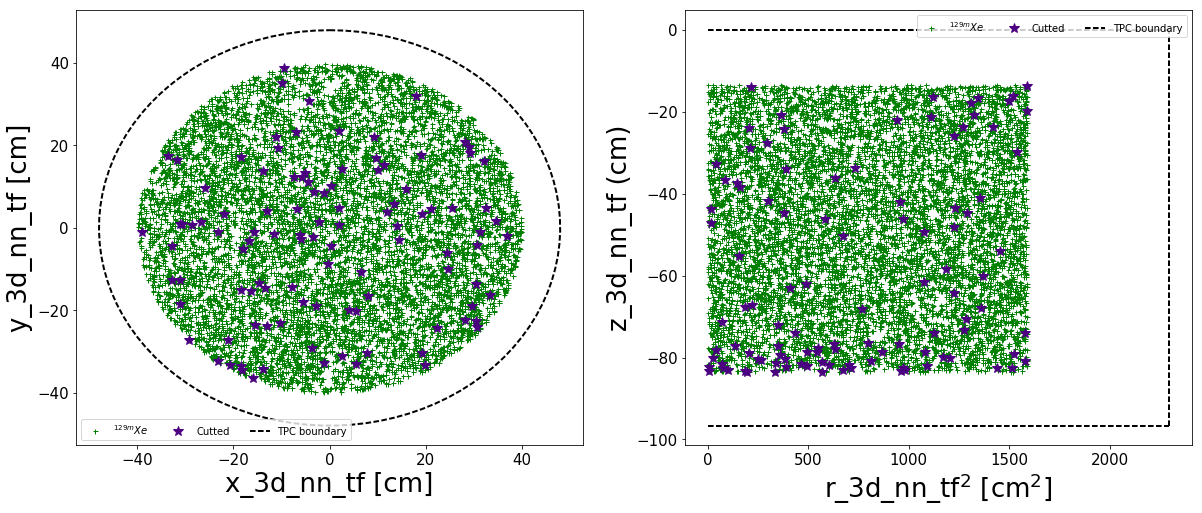

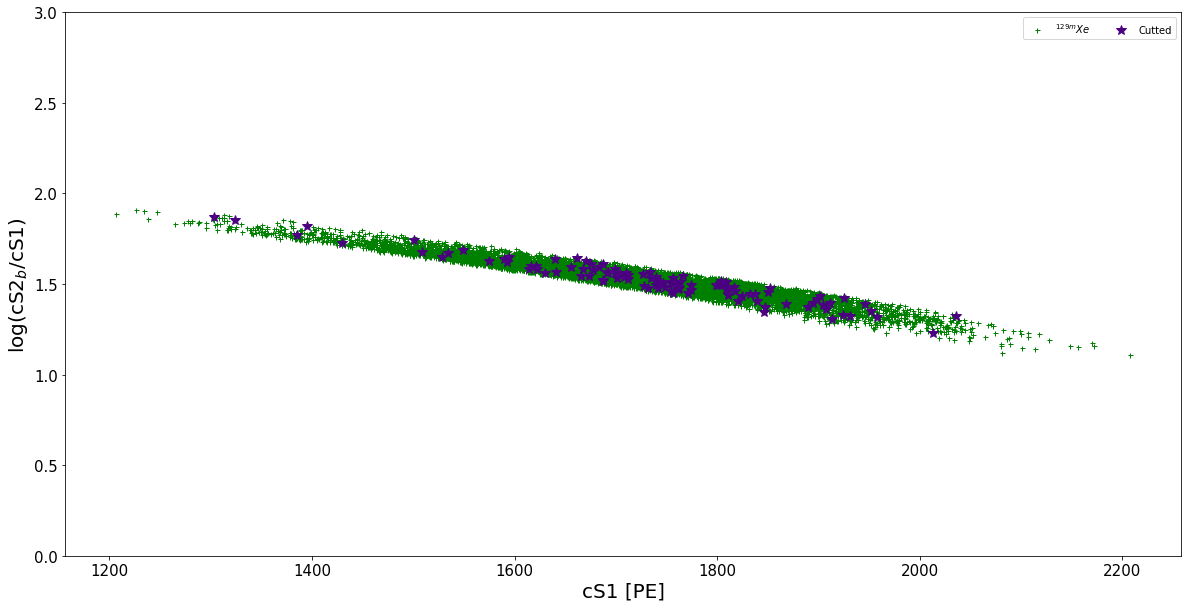

In [29]:
fig = plt.figure(figsize=(20,8))

################################################
plt.subplot(121)
plt.plot(gamma236['x_3d_nn_tf'], gamma236['y_3d_nn_tf'],
        marker='+', markersize=5, linestyle=' ', color='green', label='$^{129m}Xe$')
plt.plot(gamma236_BAD['x_3d_nn_tf'], gamma236_BAD['y_3d_nn_tf'],
        marker='*', markersize=10, linestyle=' ', color='indigo', label='Cutted')
plt_circle(linewidth=2, color='black', linestyle='--')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('x_3d_nn_tf [cm]', fontsize=26)
plt.ylabel('y_3d_nn_tf [cm]', fontsize=26)
plt.tick_params(labelsize=15)

################################################

################################################
plt.subplot(122)
plt.plot(gamma236['r_3d_nn_tf']**2, gamma236['z_3d_nn_tf'],
        marker='+', markersize=5, linestyle=' ', color='green', label='$^{129m}Xe$')
plt.plot(gamma236_BAD['r_3d_nn_tf']**2, gamma236_BAD['z_3d_nn_tf'],
        marker='*', markersize=10, linestyle=' ', color='indigo', label='Cutted')
TPC_limit(1, linewidth=2, color='black', linestyle='--')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('r_3d_nn_tf$^2$ [cm$^2$]', fontsize=26)
plt.ylabel('z_3d_nn_tf (cm)', fontsize=26)
plt.tick_params(labelsize=15)
################################################

plt.figure(figsize=(20,10))

################################################
plt.plot(gamma236['cs1_nn_tf'], np.log10(gamma236['cs2_bottom_nn_tf']/gamma236['cs1_nn_tf']),
        marker='+', markersize=5, linestyle=' ', color='green', label='$^{129m}Xe$')
plt.plot(gamma236_BAD['cs1_nn_tf'], np.log10(gamma236_BAD['cs2_bottom_nn_tf']/gamma236_BAD['cs1_nn_tf']),
        marker='*', markersize=10, linestyle=' ', color='indigo', label='Cutted')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('cS1 [PE]', fontsize=20)
plt.ylabel('log(cS2$_b$/cS1)', fontsize=20) 
plt.tick_params(labelsize=15)
plt.ylim(bottom=0, top=3)
################################################

#plt.tight_layout()
#plt.show()

(0, 3)

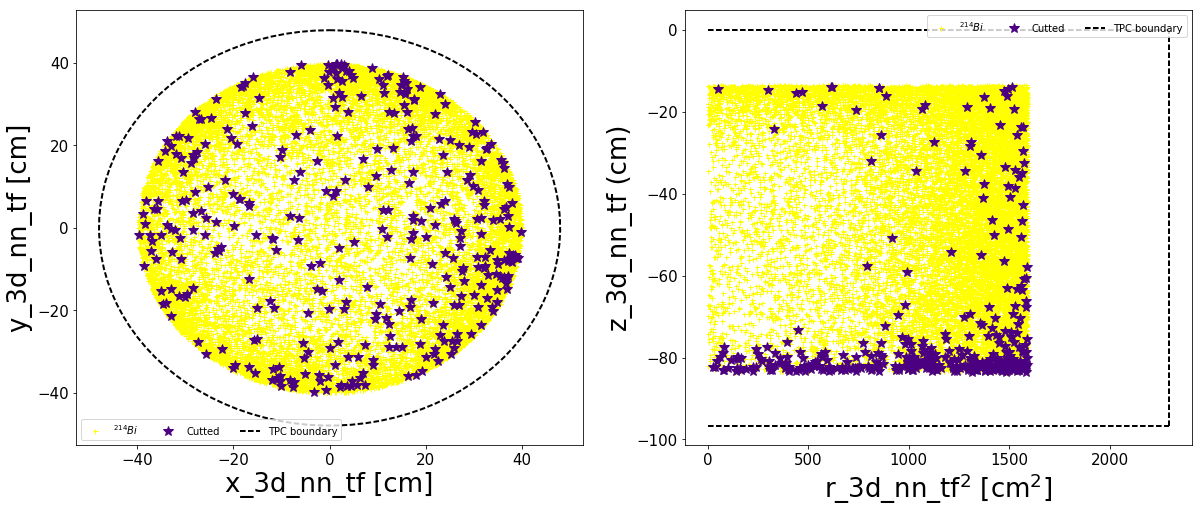

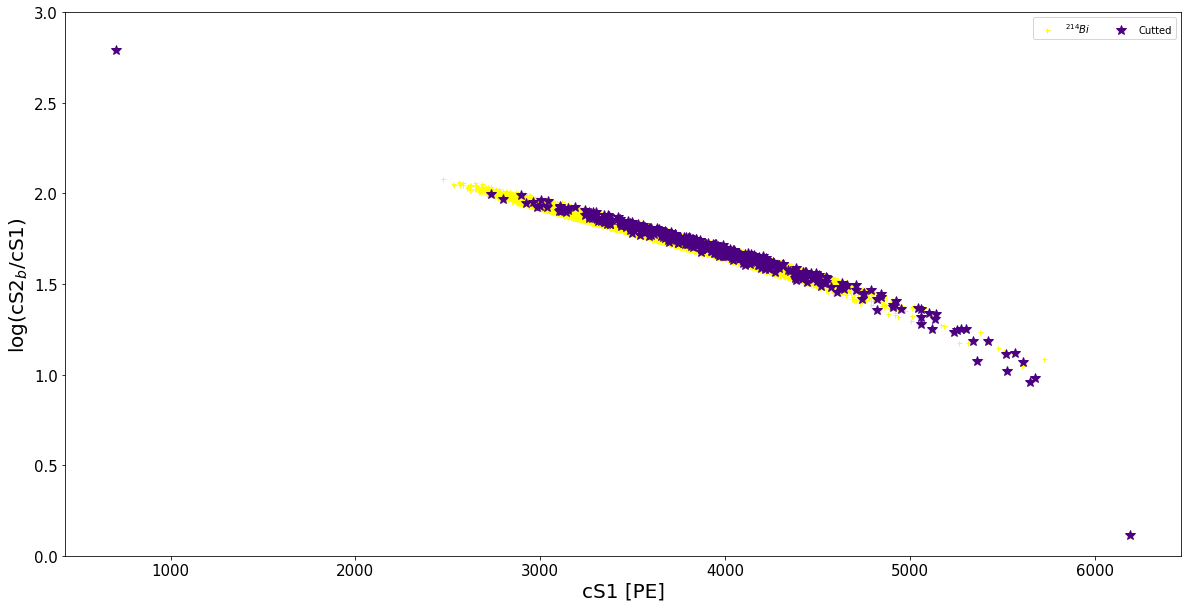

In [30]:
fig = plt.figure(figsize=(20,8))

################################################
plt.subplot(121)
plt.plot(gamma609['x_3d_nn_tf'], gamma609['y_3d_nn_tf'],
        marker='+', markersize=5, linestyle=' ', color='yellow', label='$^{214}Bi$')
plt.plot(gamma609_BAD['x_3d_nn_tf'], gamma609_BAD['y_3d_nn_tf'],
        marker='*', markersize=10, linestyle=' ', color='indigo', label='Cutted')
plt_circle(linewidth=2, color='black', linestyle='--')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('x_3d_nn_tf [cm]', fontsize=26)
plt.ylabel('y_3d_nn_tf [cm]', fontsize=26)
plt.tick_params(labelsize=15)

################################################

################################################
plt.subplot(122)
plt.plot(gamma609['r_3d_nn_tf']**2, gamma609['z_3d_nn_tf'],
        marker='+', markersize=5, linestyle=' ', color='yellow', label='$^{214}Bi$')
plt.plot(gamma609_BAD['r_3d_nn_tf']**2, gamma609_BAD['z_3d_nn_tf'],
        marker='*', markersize=10, linestyle=' ', color='indigo', label='Cutted')
TPC_limit(1, linewidth=2, color='black', linestyle='--')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('r_3d_nn_tf$^2$ [cm$^2$]', fontsize=26)
plt.ylabel('z_3d_nn_tf (cm)', fontsize=26)
plt.tick_params(labelsize=15)
################################################

plt.figure(figsize=(20,10))

################################################
plt.plot(gamma609['cs1_nn_tf'], np.log10(gamma609['cs2_bottom_nn_tf']/gamma609['cs1_nn_tf']),
        marker='+', markersize=5, linestyle=' ', color='yellow', label='$^{214}Bi$')
plt.plot(gamma609_BAD['cs1_nn_tf'], np.log10(gamma609_BAD['cs2_bottom_nn_tf']/gamma609_BAD['cs1_nn_tf']),
        marker='*', markersize=10, linestyle=' ', color='indigo', label='Cutted')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('cS1 [PE]', fontsize=20)
plt.ylabel('log(cS2$_b$/cS1)', fontsize=20) 
plt.tick_params(labelsize=15)
plt.ylim(bottom=0, top=3)
################################################

#plt.tight_layout()
#plt.show()

(0, 3)

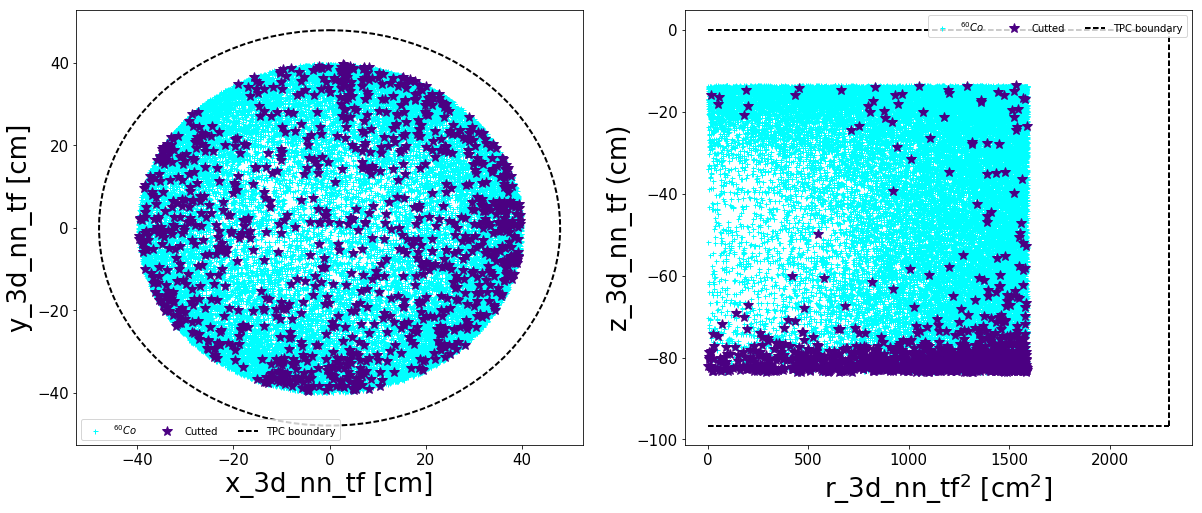

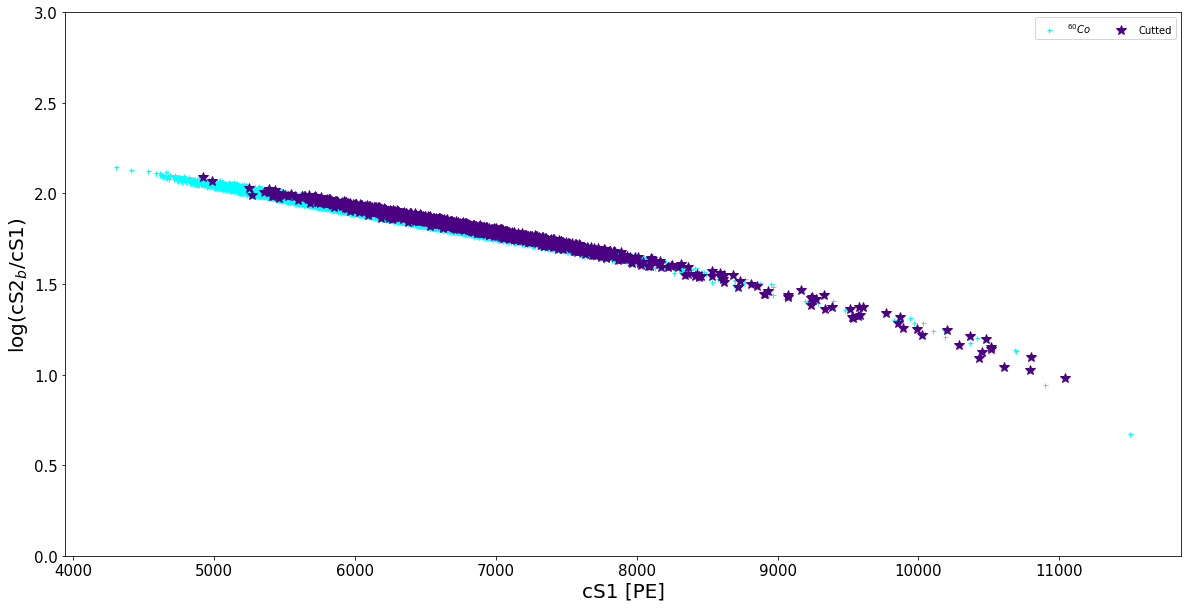

In [31]:
fig = plt.figure(figsize=(20,8))

################################################
plt.subplot(121)
plt.plot(gamma1173['x_3d_nn_tf'], gamma1173['y_3d_nn_tf'],
        marker='+', markersize=5, linestyle=' ', color='cyan', label='$^{60}Co$')
plt.plot(gamma1173_BAD['x_3d_nn_tf'], gamma1173_BAD['y_3d_nn_tf'],
        marker='*', markersize=10, linestyle=' ', color='indigo', label='Cutted')
plt_circle(linewidth=2, color='black', linestyle='--')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('x_3d_nn_tf [cm]', fontsize=26)
plt.ylabel('y_3d_nn_tf [cm]', fontsize=26)
plt.tick_params(labelsize=15)

################################################

################################################
plt.subplot(122)
plt.plot(gamma1173['r_3d_nn_tf']**2, gamma1173['z_3d_nn_tf'],
        marker='+', markersize=5, linestyle=' ', color='cyan', label='$^{60}Co$')
plt.plot(gamma1173_BAD['r_3d_nn_tf']**2, gamma1173_BAD['z_3d_nn_tf'],
        marker='*', markersize=10, linestyle=' ', color='indigo', label='Cutted')
TPC_limit(1, linewidth=2, color='black', linestyle='--')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('r_3d_nn_tf$^2$ [cm$^2$]', fontsize=26)
plt.ylabel('z_3d_nn_tf (cm)', fontsize=26)
plt.tick_params(labelsize=15)
################################################

plt.figure(figsize=(20,10))

################################################
plt.plot(gamma1173['cs1_nn_tf'], np.log10(gamma1173['cs2_bottom_nn_tf']/gamma1173['cs1_nn_tf']),
        marker='+', markersize=5, linestyle=' ', color='cyan', label='$^{60}Co$')
plt.plot(gamma1173_BAD['cs1_nn_tf'], np.log10(gamma1173_BAD['cs2_bottom_nn_tf']/gamma1173_BAD['cs1_nn_tf']),
        marker='*', markersize=10, linestyle=' ', color='indigo', label='Cutted')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('cS1 [PE]', fontsize=20)
plt.ylabel('log(cS2$_b$/cS1)', fontsize=20) 
plt.tick_params(labelsize=15)
plt.ylim(bottom=0, top=3)
################################################

#plt.tight_layout()
#plt.show()

(0, 3)

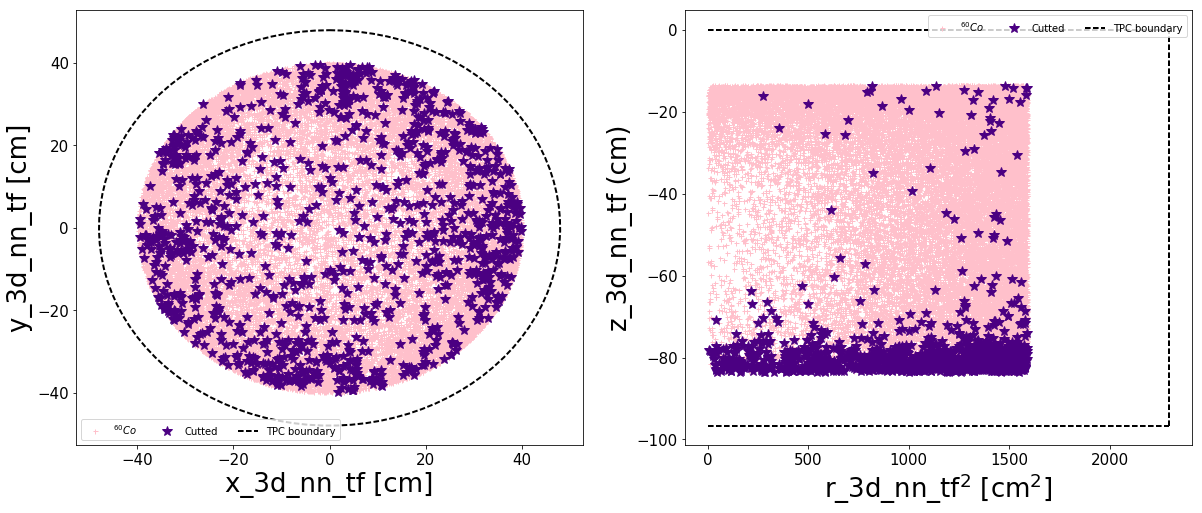

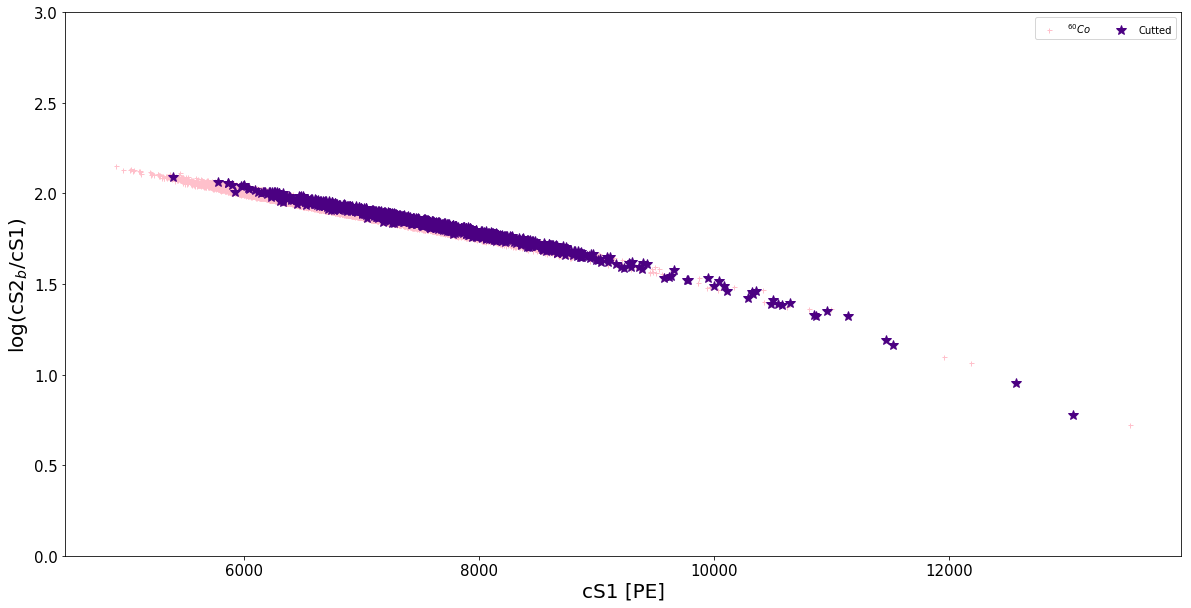

In [32]:
fig = plt.figure(figsize=(20,8))

################################################
plt.subplot(121)
plt.plot(gamma1332['x_3d_nn_tf'], gamma1332['y_3d_nn_tf'],
        marker='+', markersize=5, linestyle=' ', color='pink', label='$^{60}Co$')
plt.plot(gamma1332_BAD['x_3d_nn_tf'], gamma1332_BAD['y_3d_nn_tf'],
        marker='*', markersize=10, linestyle=' ', color='indigo', label='Cutted')
plt_circle(linewidth=2, color='black', linestyle='--')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('x_3d_nn_tf [cm]', fontsize=26)
plt.ylabel('y_3d_nn_tf [cm]', fontsize=26)
plt.tick_params(labelsize=15)

################################################

################################################
plt.subplot(122)
plt.plot(gamma1332['r_3d_nn_tf']**2, gamma1332['z_3d_nn_tf'],
        marker='+', markersize=5, linestyle=' ', color='pink', label='$^{60}Co$')
plt.plot(gamma1332_BAD['r_3d_nn_tf']**2, gamma1332_BAD['z_3d_nn_tf'],
        marker='*', markersize=10, linestyle=' ', color='indigo', label='Cutted')
TPC_limit(1, linewidth=2, color='black', linestyle='--')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('r_3d_nn_tf$^2$ [cm$^2$]', fontsize=26)
plt.ylabel('z_3d_nn_tf (cm)', fontsize=26)
plt.tick_params(labelsize=15)
################################################

plt.figure(figsize=(20,10))

################################################
plt.plot(gamma1332['cs1_nn_tf'], np.log10(gamma1332['cs2_bottom_nn_tf']/gamma1332['cs1_nn_tf']),
        marker='+', markersize=5, linestyle=' ', color='pink', label='$^{60}Co$')
plt.plot(gamma1332_BAD['cs1_nn_tf'], np.log10(gamma1332_BAD['cs2_bottom_nn_tf']/gamma1332_BAD['cs1_nn_tf']),
        marker='*', markersize=10, linestyle=' ', color='indigo', label='Cutted')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('cS1 [PE]', fontsize=20)
plt.ylabel('log(cS2$_b$/cS1)', fontsize=20) 
plt.tick_params(labelsize=15)
plt.ylim(bottom=0, top=3)
################################################

#plt.tight_layout()
#plt.show()

(0, 3)

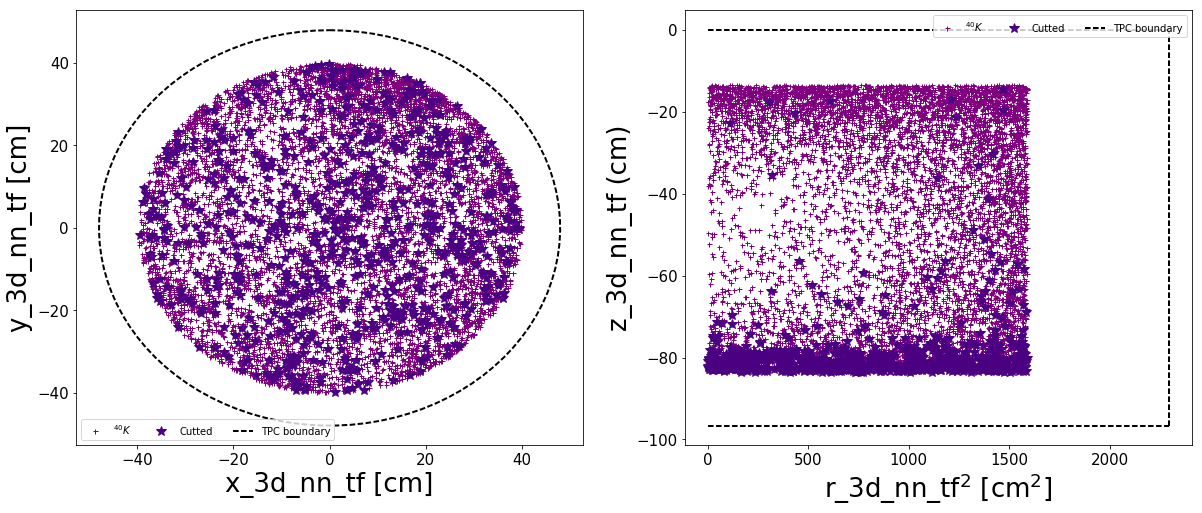

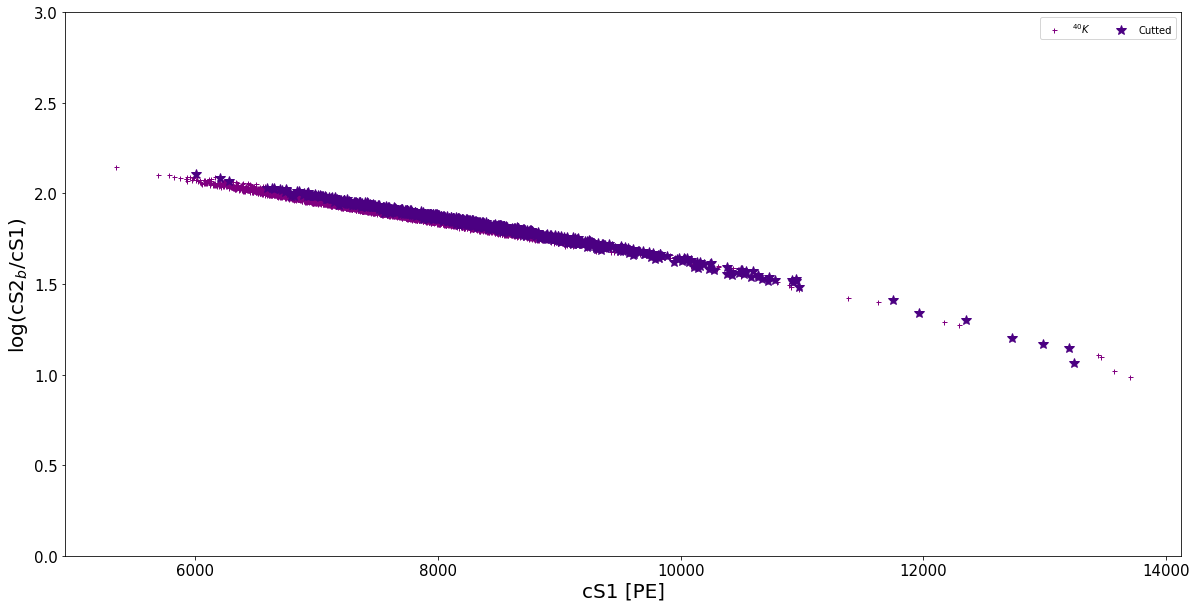

In [33]:
fig = plt.figure(figsize=(20,8))

################################################
plt.subplot(121)
plt.plot(gamma1461['x_3d_nn_tf'], gamma1461['y_3d_nn_tf'],
        marker='+', markersize=5, linestyle=' ', color='purple', label='$^{40}K$')
plt.plot(gamma1461_BAD['x_3d_nn_tf'], gamma1461_BAD['y_3d_nn_tf'],
        marker='*', markersize=10, linestyle=' ', color='indigo', label='Cutted')
plt_circle(linewidth=2, color='black', linestyle='--')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('x_3d_nn_tf [cm]', fontsize=26)
plt.ylabel('y_3d_nn_tf [cm]', fontsize=26)
plt.tick_params(labelsize=15)

################################################

################################################
plt.subplot(122)
plt.plot(gamma1461['r_3d_nn_tf']**2, gamma1461['z_3d_nn_tf'],
        marker='+', markersize=5, linestyle=' ', color='purple', label='$^{40}K$')
plt.plot(gamma1461_BAD['r_3d_nn_tf']**2, gamma1461_BAD['z_3d_nn_tf'],
        marker='*', markersize=10, linestyle=' ', color='indigo', label='Cutted')
TPC_limit(1, linewidth=2, color='black', linestyle='--')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('r_3d_nn_tf$^2$ [cm$^2$]', fontsize=26)
plt.ylabel('z_3d_nn_tf (cm)', fontsize=26)
plt.tick_params(labelsize=15)
################################################

plt.figure(figsize=(20,10))

################################################
plt.plot(gamma1461['cs1_nn_tf'], np.log10(gamma1461['cs2_bottom_nn_tf']/gamma1461['cs1_nn_tf']),
        marker='+', markersize=5, linestyle=' ', color='purple', label='$^{40}K$')
plt.plot(gamma1461_BAD['cs1_nn_tf'], np.log10(gamma1461_BAD['cs2_bottom_nn_tf']/gamma1461_BAD['cs1_nn_tf']),
        marker='*', markersize=10, linestyle=' ', color='indigo', label='Cutted')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('cS1 [PE]', fontsize=20)
plt.ylabel('log(cS2$_b$/cS1)', fontsize=20) 
plt.tick_params(labelsize=15)
plt.ylim(bottom=0, top=3)
################################################

#plt.tight_layout()
#plt.show()

(0, 3)

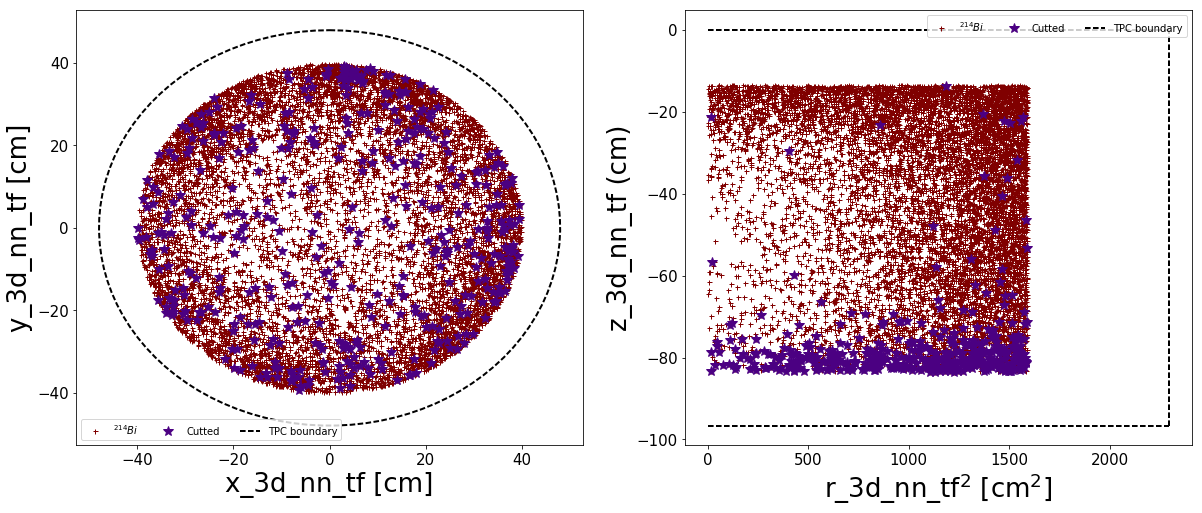

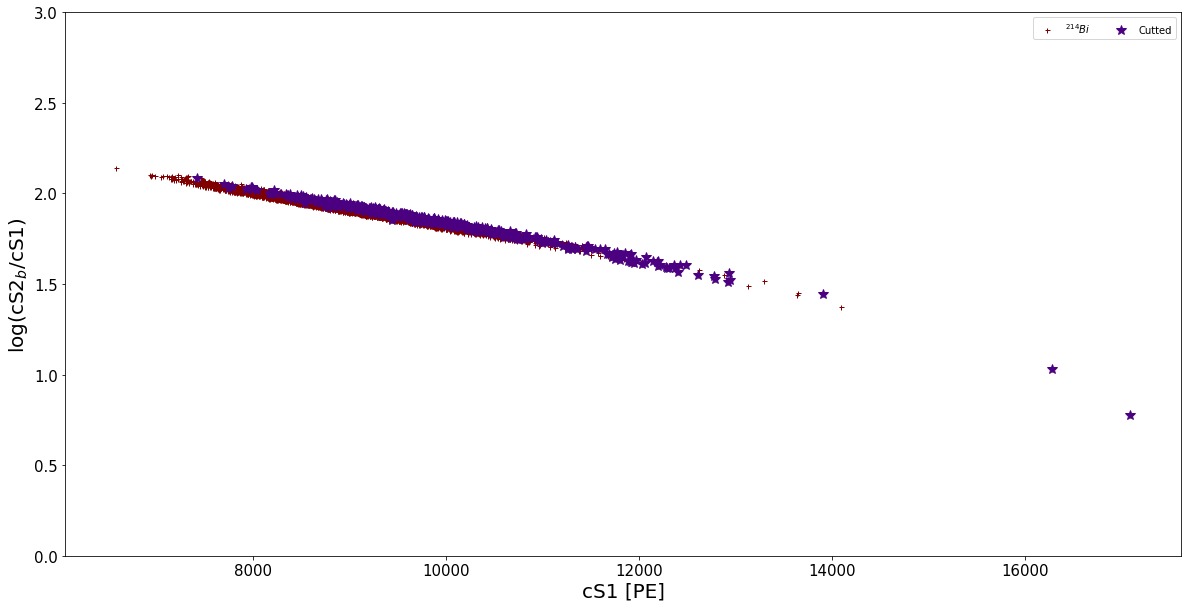

In [34]:
fig = plt.figure(figsize=(20,8))

################################################
plt.subplot(121)
plt.plot(gamma1764['x_3d_nn_tf'], gamma1764['y_3d_nn_tf'],
        marker='+', markersize=5, linestyle=' ', color='maroon', label='$^{214}Bi$')
plt.plot(gamma1764_BAD['x_3d_nn_tf'], gamma1764_BAD['y_3d_nn_tf'],
        marker='*', markersize=10, linestyle=' ', color='indigo', label='Cutted')
plt_circle(linewidth=2, color='black', linestyle='--')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('x_3d_nn_tf [cm]', fontsize=26)
plt.ylabel('y_3d_nn_tf [cm]', fontsize=26)
plt.tick_params(labelsize=15)

################################################

################################################
plt.subplot(122)
plt.plot(gamma1764['r_3d_nn_tf']**2, gamma1764['z_3d_nn_tf'],
        marker='+', markersize=5, linestyle=' ', color='maroon', label='$^{214}Bi$')
plt.plot(gamma1764_BAD['r_3d_nn_tf']**2, gamma1764_BAD['z_3d_nn_tf'],
        marker='*', markersize=10, linestyle=' ', color='indigo', label='Cutted')
TPC_limit(1, linewidth=2, color='black', linestyle='--')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('r_3d_nn_tf$^2$ [cm$^2$]', fontsize=26)
plt.ylabel('z_3d_nn_tf (cm)', fontsize=26)
plt.tick_params(labelsize=15)
################################################

plt.figure(figsize=(20,10))

################################################
plt.plot(gamma1764['cs1_nn_tf'], np.log10(gamma1764['cs2_bottom_nn_tf']/gamma1764['cs1_nn_tf']),
        marker='+', markersize=5, linestyle=' ', color='maroon', label='$^{214}Bi$')
plt.plot(gamma1764_BAD['cs1_nn_tf'], np.log10(gamma1764_BAD['cs2_bottom_nn_tf']/gamma1764_BAD['cs1_nn_tf']),
        marker='*', markersize=10, linestyle=' ', color='indigo', label='Cutted')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('cS1 [PE]', fontsize=20)
plt.ylabel('log(cS2$_b$/cS1)', fontsize=20) 
plt.tick_params(labelsize=15)
plt.ylim(bottom=0, top=3)
################################################

#plt.tight_layout()
#plt.show()

(0, 3)

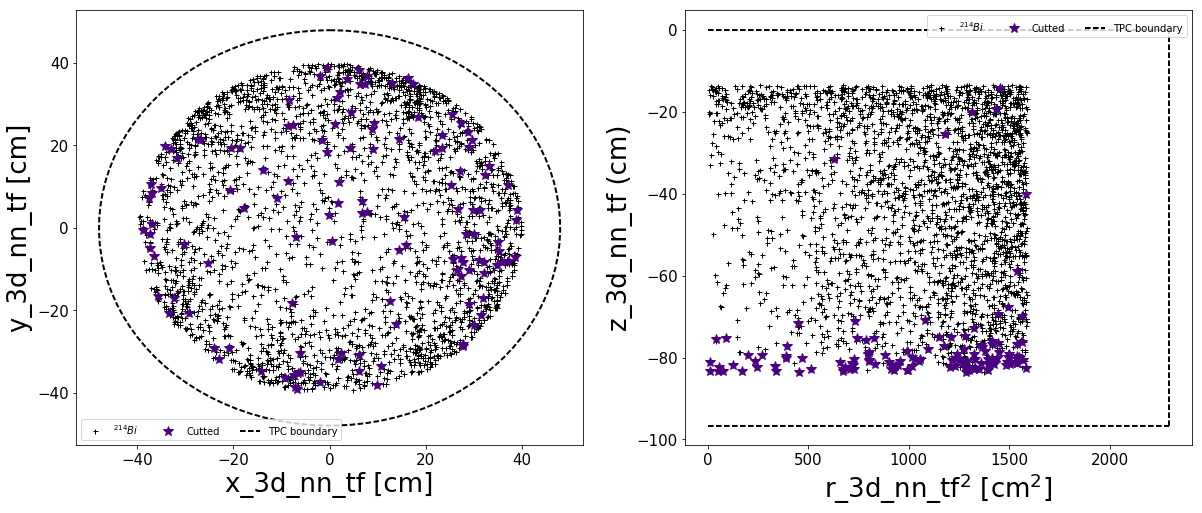

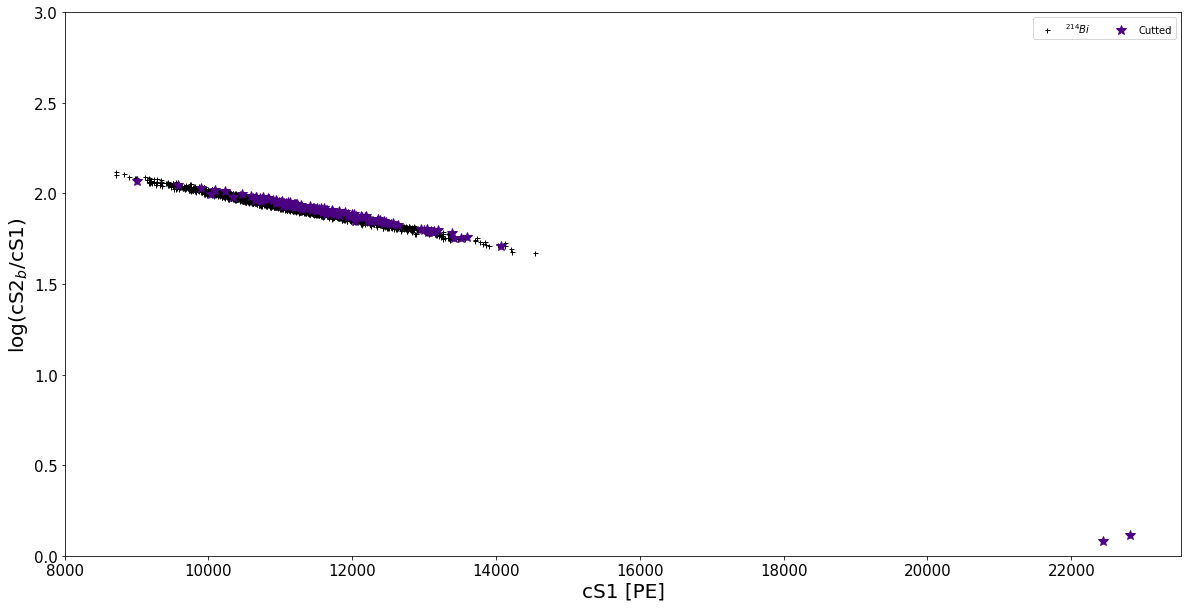

In [36]:
fig = plt.figure(figsize=(20,8))

################################################
plt.subplot(121)
plt.plot(gamma2204['x_3d_nn_tf'], gamma2204['y_3d_nn_tf'],
        marker='+', markersize=5, linestyle=' ', color='black', label='$^{214}Bi$')
plt.plot(gamma2204_BAD['x_3d_nn_tf'], gamma2204_BAD['y_3d_nn_tf'],
        marker='*', markersize=10, linestyle=' ', color='indigo', label='Cutted')
plt_circle(linewidth=2, color='black', linestyle='--')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('x_3d_nn_tf [cm]', fontsize=26)
plt.ylabel('y_3d_nn_tf [cm]', fontsize=26)
plt.tick_params(labelsize=15)

################################################

################################################
plt.subplot(122)
plt.plot(gamma2204['r_3d_nn_tf']**2, gamma2204['z_3d_nn_tf'],
        marker='+', markersize=5, linestyle=' ', color='black', label='$^{214}Bi$')
plt.plot(gamma2204_BAD['r_3d_nn_tf']**2, gamma2204_BAD['z_3d_nn_tf'],
        marker='*', markersize=10, linestyle=' ', color='indigo', label='Cutted')
TPC_limit(1, linewidth=2, color='black', linestyle='--')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('r_3d_nn_tf$^2$ [cm$^2$]', fontsize=26)
plt.ylabel('z_3d_nn_tf (cm)', fontsize=26)
plt.tick_params(labelsize=15)
################################################

plt.figure(figsize=(20,10))

################################################
plt.plot(gamma2204['cs1_nn_tf'], np.log10(gamma2204['cs2_bottom_nn_tf']/gamma2204['cs1_nn_tf']),
        marker='+', markersize=5, linestyle=' ', color='black', label='$^{214}Bi$')
plt.plot(gamma2204_BAD['cs1_nn_tf'], np.log10(gamma2204_BAD['cs2_bottom_nn_tf']/gamma2204_BAD['cs1_nn_tf']),
        marker='*', markersize=10, linestyle=' ', color='indigo', label='Cutted')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('cS1 [PE]', fontsize=20)
plt.ylabel('log(cS2$_b$/cS1)', fontsize=20) 
plt.tick_params(labelsize=15)
plt.ylim(bottom=0, top=3)
################################################

#plt.tight_layout()
#plt.show()

(0, 3)

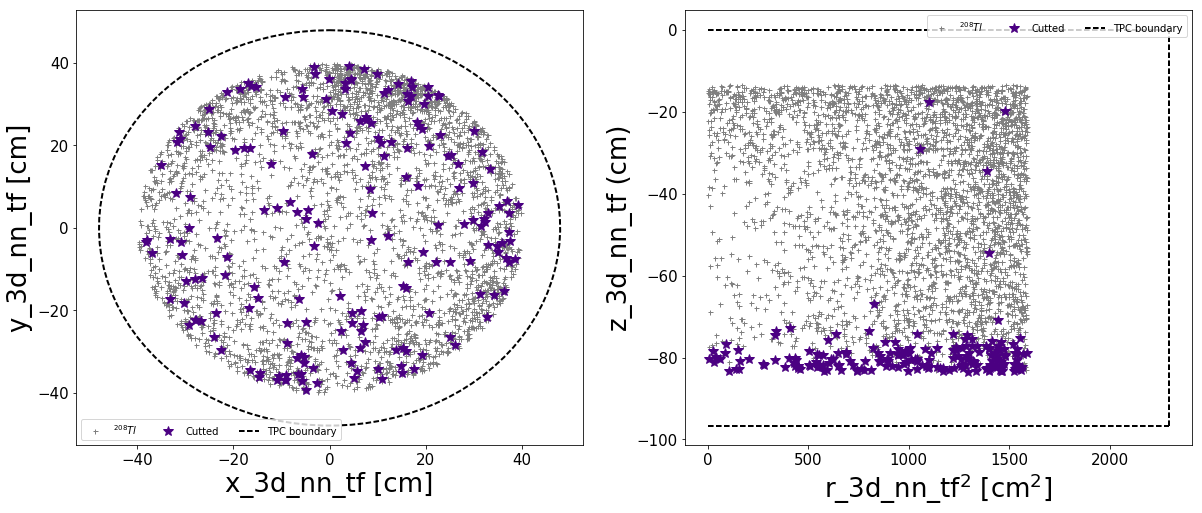

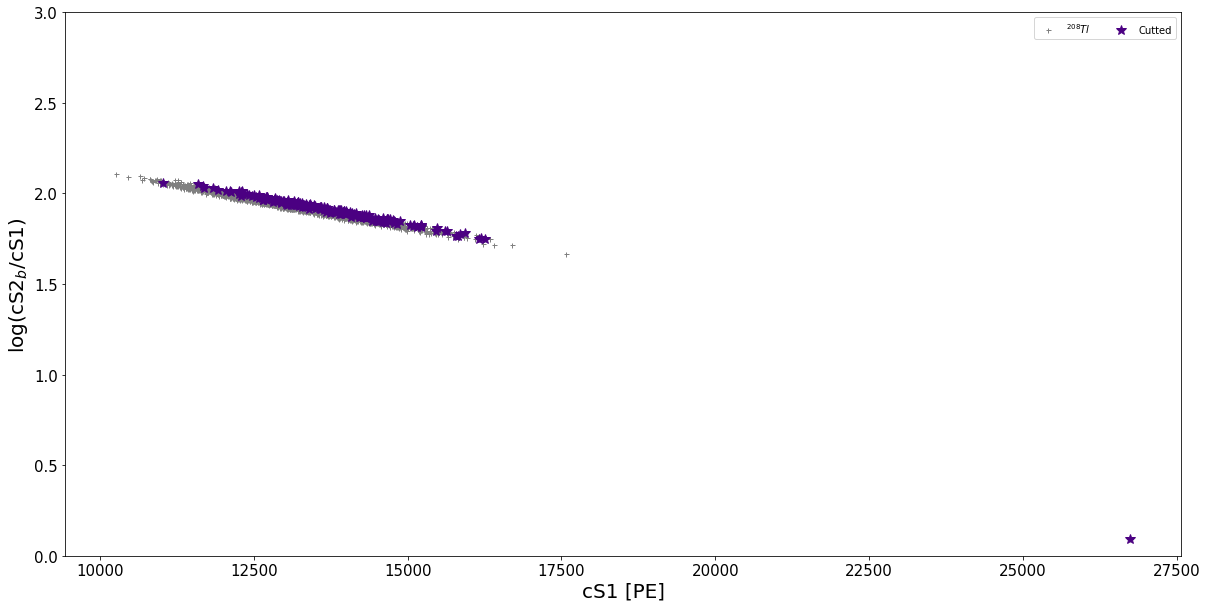

In [37]:
fig = plt.figure(figsize=(20,8))

################################################
plt.subplot(121)
plt.plot(gamma2614['x_3d_nn_tf'], gamma2614['y_3d_nn_tf'],
        marker='+', markersize=5, linestyle=' ', color='grey', label='$^{208}Tl$')
plt.plot(gamma2614_BAD['x_3d_nn_tf'], gamma2614_BAD['y_3d_nn_tf'],
        marker='*', markersize=10, linestyle=' ', color='indigo', label='Cutted')
plt_circle(linewidth=2, color='black', linestyle='--')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('x_3d_nn_tf [cm]', fontsize=26)
plt.ylabel('y_3d_nn_tf [cm]', fontsize=26)
plt.tick_params(labelsize=15)

################################################

################################################
plt.subplot(122)
plt.plot(gamma2614['r_3d_nn_tf']**2, gamma2614['z_3d_nn_tf'],
        marker='+', markersize=5, linestyle=' ', color='grey', label='$^{208}Tl$')
plt.plot(gamma2614_BAD['r_3d_nn_tf']**2, gamma2614_BAD['z_3d_nn_tf'],
        marker='*', markersize=10, linestyle=' ', color='indigo', label='Cutted')
TPC_limit(1, linewidth=2, color='black', linestyle='--')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('r_3d_nn_tf$^2$ [cm$^2$]', fontsize=26)
plt.ylabel('z_3d_nn_tf (cm)', fontsize=26)
plt.tick_params(labelsize=15)
################################################

plt.figure(figsize=(20,10))

################################################
plt.plot(gamma2614['cs1_nn_tf'], np.log10(gamma2614['cs2_bottom_nn_tf']/gamma2614['cs1_nn_tf']),
        marker='+', markersize=5, linestyle=' ', color='grey', label='$^{208}Tl$')
plt.plot(gamma2614_BAD['cs1_nn_tf'], np.log10(gamma2614_BAD['cs2_bottom_nn_tf']/gamma2614_BAD['cs1_nn_tf']),
        marker='*', markersize=10, linestyle=' ', color='indigo', label='Cutted')
plt.legend(loc=0, ncol=3, fontsize = 10)
plt.xlabel('cS1 [PE]', fontsize=20)
plt.ylabel('log(cS2$_b$/cS1)', fontsize=20) 
plt.tick_params(labelsize=15)
plt.ylim(bottom=0, top=3)
################################################

#plt.tight_layout()
#plt.show()

### Controlliamo le wf degli eventi con log(cS2b/cS1) < 1.5 e qualche wf (almeno 4 per picco)

In [77]:
gamma42_BAD_wf = gamma42_BAD[np.log10(gamma42_BAD['cs2_bottom_nn_tf']/gamma42_BAD['cs1_nn_tf'])<1.4]
gamma42_BAD_wf = gamma42_BAD_wf.sample(n = 3)

gamma42_BAD_wf_2 = gamma42_BAD[(np.log10(gamma42_BAD['cs2_bottom_nn_tf']/gamma42_BAD['cs1_nn_tf'])<2)&(np.log10(gamma42_BAD['cs2_bottom_nn_tf']/gamma42_BAD['cs1_nn_tf'])>=1.4)]
gamma42_BAD_wf_2 = gamma42_BAD_wf_2.sample(n = 3)

In [97]:
gamma42_BAD_wf.to_json('/dali/lgrandi/giovo/RawWaveForms/data/photopeak/Kr42_X.json')
gamma42_BAD_wf_2.to_json('/dali/lgrandi/giovo/RawWaveForms/data/photopeak/Kr42_gamma.json')

In [79]:
gamma164_BAD_wf = gamma164_BAD[np.log10(gamma164_BAD['cs2_bottom_nn_tf']/gamma164_BAD['cs1_nn_tf'])<1.4]
gamma164_BAD_wf = gamma164_BAD_wf.sample(n = 3)

gamma164_BAD_wf_2 = gamma164_BAD[(np.log10(gamma164_BAD['cs2_bottom_nn_tf']/gamma164_BAD['cs1_nn_tf'])<2)&(np.log10(gamma164_BAD['cs2_bottom_nn_tf']/gamma164_BAD['cs1_nn_tf'])>1.4)]
gamma164_BAD_wf_2 = gamma164_BAD_wf_2.sample(n = 5)

In [80]:
gamma164_BAD_wf.to_json('/dali/lgrandi/giovo/RawWaveForms/data/photopeak/Xe164_X.json')
gamma164_BAD_wf_2.to_json('/dali/lgrandi/giovo/RawWaveForms/data/photopeak/Xe164_gamma.json')

In [81]:
gamma236_BAD_wf = gamma236_BAD[np.log10(gamma236_BAD['cs2_bottom_nn_tf']/gamma236_BAD['cs1_nn_tf'])<1.4]
gamma236_BAD_wf = gamma236_BAD_wf.sample(n = 3)

gamma236_BAD_wf_2 = gamma236_BAD[(np.log10(gamma236_BAD['cs2_bottom_nn_tf']/gamma236_BAD['cs1_nn_tf'])<2)&(np.log10(gamma236_BAD['cs2_bottom_nn_tf']/gamma236_BAD['cs1_nn_tf'])>1.4)]
gamma236_BAD_wf_2 = gamma236_BAD_wf_2.sample(n = 5)

In [82]:
gamma236_BAD_wf.to_json('/dali/lgrandi/giovo/RawWaveForms/data/photopeak/Xe236_X.json')
gamma236_BAD_wf_2.to_json('/dali/lgrandi/giovo/RawWaveForms/data/photopeak/Xe236_gamma.json')

In [83]:
gamma609_BAD_wf = gamma609_BAD[np.log10(gamma609_BAD['cs2_bottom_nn_tf']/gamma609_BAD['cs1_nn_tf'])<1.4]
gamma609_BAD_wf = gamma609_BAD_wf.sample(n = 3)

gamma609_BAD_wf_2 = gamma609_BAD[(np.log10(gamma609_BAD['cs2_bottom_nn_tf']/gamma609_BAD['cs1_nn_tf'])<2)&(np.log10(gamma609_BAD['cs2_bottom_nn_tf']/gamma609_BAD['cs1_nn_tf'])>1.4)]
gamma609_BAD_wf_2 = gamma609_BAD_wf_2.sample(n = 5)

In [84]:
gamma609_BAD_wf.to_json('/dali/lgrandi/giovo/RawWaveForms/data/photopeak/Bi609_X.json')
gamma609_BAD_wf_2.to_json('/dali/lgrandi/giovo/RawWaveForms/data/photopeak/Bi609_gamma.json')

In [85]:
gamma1173_BAD_wf = gamma1173_BAD[np.log10(gamma1173_BAD['cs2_bottom_nn_tf']/gamma1173_BAD['cs1_nn_tf'])<1.4]
gamma1173_BAD_wf = gamma1173_BAD_wf.sample(n = 3)

gamma1173_BAD_wf_2 = gamma1173_BAD[(np.log10(gamma1173_BAD['cs2_bottom_nn_tf']/gamma1173_BAD['cs1_nn_tf'])<2)&(np.log10(gamma1173_BAD['cs2_bottom_nn_tf']/gamma1173_BAD['cs1_nn_tf'])>1.4)]
gamma1173_BAD_wf_2 = gamma1173_BAD_wf_2.sample(n = 5)

In [86]:
gamma1173_BAD_wf.to_json('/dali/lgrandi/giovo/RawWaveForms/data/photopeak/Co1173_X.json')
gamma1173_BAD_wf_2.to_json('/dali/lgrandi/giovo/RawWaveForms/data/photopeak/Co1173_gamma.json')

In [87]:
gamma1332_BAD_wf = gamma1332_BAD[np.log10(gamma1332_BAD['cs2_bottom_nn_tf']/gamma1332_BAD['cs1_nn_tf'])<1.4]
gamma1332_BAD_wf = gamma1332_BAD_wf.sample(n = 3)

gamma1332_BAD_wf_2 = gamma1332_BAD[(np.log10(gamma1332_BAD['cs2_bottom_nn_tf']/gamma1332_BAD['cs1_nn_tf'])<2)&(np.log10(gamma1332_BAD['cs2_bottom_nn_tf']/gamma1332_BAD['cs1_nn_tf'])>1.4)]
gamma1332_BAD_wf_2 = gamma1332_BAD_wf_2.sample(n = 5)

In [88]:
gamma1332_BAD_wf.to_json('/dali/lgrandi/giovo/RawWaveForms/data/photopeak/Co1332_X.json')
gamma1332_BAD_wf_2.to_json('/dali/lgrandi/giovo/RawWaveForms/data/photopeak/Co1332_gamma.json')

In [89]:
gamma1461_BAD_wf = gamma1461_BAD[np.log10(gamma1461_BAD['cs2_bottom_nn_tf']/gamma1461_BAD['cs1_nn_tf'])<1.4]
gamma1461_BAD_wf = gamma1461_BAD_wf.sample(n = 3)

gamma1461_BAD_wf_2 = gamma1461_BAD[(np.log10(gamma1461_BAD['cs2_bottom_nn_tf']/gamma1461_BAD['cs1_nn_tf'])<2)&(np.log10(gamma1461_BAD['cs2_bottom_nn_tf']/gamma1461_BAD['cs1_nn_tf'])>1.4)]
gamma1461_BAD_wf_2 = gamma1461_BAD_wf_2.sample(n = 5)

In [90]:
gamma1461_BAD_wf.to_json('/dali/lgrandi/giovo/RawWaveForms/data/photopeak/K1461_X.json')
gamma1461_BAD_wf_2.to_json('/dali/lgrandi/giovo/RawWaveForms/data/photopeak/K1461_gamma.json')

In [91]:
gamma1764_BAD_wf = gamma1764_BAD[np.log10(gamma1764_BAD['cs2_bottom_nn_tf']/gamma1764_BAD['cs1_nn_tf'])<1.4]
#gamma1764_BAD_wf = gamma1764_BAD_wf.sample(n = 3)

gamma1764_BAD_wf_2 = gamma1764_BAD[(np.log10(gamma1764_BAD['cs2_bottom_nn_tf']/gamma1764_BAD['cs1_nn_tf'])<2)&(np.log10(gamma1764_BAD['cs2_bottom_nn_tf']/gamma1764_BAD['cs1_nn_tf'])>1.4)]
gamma1764_BAD_wf_2 = gamma1764_BAD_wf_2.sample(n = 5)

In [92]:
gamma1764_BAD_wf.to_json('/dali/lgrandi/giovo/RawWaveForms/data/photopeak/Bi1764_X.json')
gamma1764_BAD_wf_2.to_json('/dali/lgrandi/giovo/RawWaveForms/data/photopeak/Bi1764_gamma.json')

In [93]:
gamma2204_BAD_wf = gamma2204_BAD[np.log10(gamma2204_BAD['cs2_bottom_nn_tf']/gamma2204_BAD['cs1_nn_tf'])<1.4]
#gamma2204_BAD_wf = gamma2204_BAD_wf.sample(n = 3)

gamma2204_BAD_wf_2 = gamma2204_BAD[(np.log10(gamma2204_BAD['cs2_bottom_nn_tf']/gamma2204_BAD['cs1_nn_tf'])<2)&(np.log10(gamma2204_BAD['cs2_bottom_nn_tf']/gamma2204_BAD['cs1_nn_tf'])>1.4)]
gamma2204_BAD_wf_2 = gamma2204_BAD_wf_2.sample(n = 5)

In [94]:
gamma2204_BAD_wf.to_json('/dali/lgrandi/giovo/RawWaveForms/data/photopeak/Bi2204_X.json')
gamma2204_BAD_wf_2.to_json('/dali/lgrandi/giovo/RawWaveForms/data/photopeak/Bi2204_gamma.json')

In [95]:
gamma2614_BAD_wf = gamma2614_BAD[np.log10(gamma2614_BAD['cs2_bottom_nn_tf']/gamma2614_BAD['cs1_nn_tf'])<1.4]
#gamma2614_BAD_wf = gamma2614_BAD_wf.sample(n = 3)

gamma2614_BAD_wf_2 = gamma2614_BAD[(np.log10(gamma2614_BAD['cs2_bottom_nn_tf']/gamma2614_BAD['cs1_nn_tf'])<2)&(np.log10(gamma2614_BAD['cs2_bottom_nn_tf']/gamma2614_BAD['cs1_nn_tf'])>1.4)]
gamma2614_BAD_wf_2 = gamma2614_BAD_wf_2.sample(n = 5)

In [96]:
gamma2614_BAD_wf.to_json('/dali/lgrandi/giovo/RawWaveForms/data/photopeak/Tl2614_X.json')
gamma2614_BAD_wf_2.to_json('/dali/lgrandi/giovo/RawWaveForms/data/photopeak/Tl2614_gamma.json')